<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Regression%20with%20Tensorflow/neural_network_regression_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Neural Network

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Create Data to View and Fit

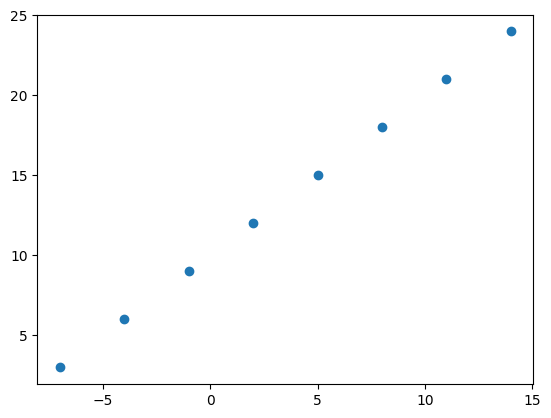

In [2]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [3]:
# create a demo tensor for our house prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_price = tf.cast(house_price, dtype=tf.float32)

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In the above case input shape and output shape is coming blank because they are tensors of rank 0, that means it has no dimension or 0 dimension

In [5]:
X[0].ndim

0

One of the most common error in deep learning is input and output shape

## Turn Numpy Arrays To Tensors

In [6]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling the tensorflow
1. **Creating a model** - Define the input and output layers, as well as the hidden layers in the deep learning model
2. **Compiling a model** - Define the `loss function` (in other words, the function which tells us our model how wrong it is) and the `optimizer` ( tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - Letting the model try to find patterns between X & y(features and labels)

In [9]:
# Seta random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (BOTH works tf.expand_dims() function as well as X[..., newaxis])
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)
model.fit(X[..., tf.newaxis], y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 17.1691 - mae: 17.1691
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 16.8879 - mae: 16.8879
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 16.6066 - mae: 16.6066
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 16.3254 - mae: 16.3254
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 16.0441 - mae: 16.0441


### Alternative way

In [10]:
tf.random.set_seed(42)

# Create thw model
model = tf.keras.Sequential([])

# Add a layer to the model
model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# Fit the model
model.fit(X[..., tf.newaxis], y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 792ms/step - loss: 10.4900 - mae: 10.4900
Epoch 2/5
1/1 [==============================] - 0s 37ms/step - loss: 10.3575 - mae: 10.3575
Epoch 3/5
1/1 [==============================] - 0s 28ms/step - loss: 10.2250 - mae: 10.2250
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 10.0925 - mae: 10.0925
Epoch 5/5
1/1 [==============================] - 0s 51ms/step - loss: 9.9600 - mae: 9.9600


In [11]:
# Predict the label from the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 1s 722ms/step


array([[17.644762]], dtype=float32)

In [12]:
y_pred = model.predict(y)
y_pred

1/1 [==============================] - 0s 472ms/step


array([[ 3.154958 ],
       [ 6.2599163],
       [ 9.364875 ],
       [12.469832 ],
       [15.57479  ],
       [18.679749 ],
       [21.784706 ],
       [24.889664 ]], dtype=float32)

## Improving the model
We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.

3. **Fitting a model** - Here we might fit the model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# Let's rebuild the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model.fit(X[..., tf.newaxis], y, epochs=100, verbose=0)

## See the History of the Model

In [14]:
type(model.history.history)

dict

In [15]:
loss_history = model.history.history["loss"]
mae_history = model.history.history["mae"]

# Last loss
last_loss = loss_history[-1]
last_mae = mae_history[-1]
last_loss, last_mae

(6.834375381469727, 6.834375381469727)

In [16]:
# create model with extra hidden layer and activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [17]:
loss_history = model.history.history["loss"]
mae_history = model.history.history["mae"]

# Last loss
last_loss = loss_history[-1]
last_mae = mae_history[-1]
last_loss, last_mae

(0.17342782020568848, 0.17342782020568848)

## Evaluating a tensorflow model
In practice a typical workflow you'll go through when building neural network is :

Build a model -> Fit it -> Evaluate it -> Tweak it -> ....

When it comes to evaluation ... you should always remember... VISUALIZE..

1. The data - What data we are working? what it looks like ?

2. The model itself - What does our model look like

3. The training of a model - How the model perform while it learns?

4. The prediction of the model - How do the predictions of a model line up against the ground truth ?

In [18]:
# create a tensor data with more numbers
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the data
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

## Split the data to training and tseting set

1. **The training set** - The model learns from this data, which is typically 70-80% of the total data

2. **Validation set** - The model gets tuned in this data, which is typically 10-15% of the total data.

3. **Test set** - the model gets evaluated in this set to test what it has learned, this set is typically 10-15% of the total data available

In [20]:
# Check how many samplse we have
len(X)

50

In [21]:
# Split the data
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

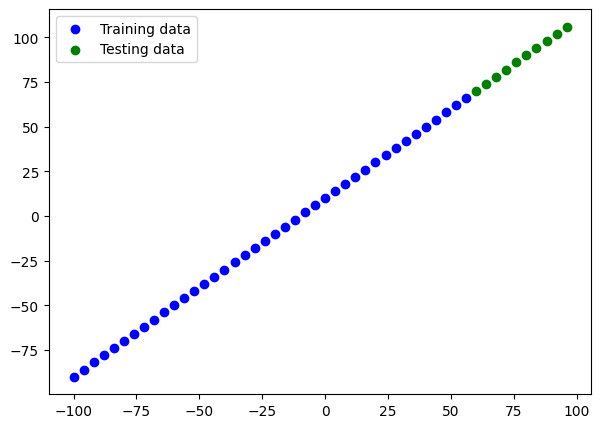

In [22]:
# Visualizing the data
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

## Getting Model Summary

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=['mae'])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1. **Total params** - Total number of parameters in the model.

2. **Trainable parameters** - These are the parameters (patterns) the model can update as it trains.

3. **Non-trainable params** - These are already trained parameters, not required to trained ( this is typical when you bring in already learned patterns or parameters from other models during **transfer learning** )

## Plot The Model

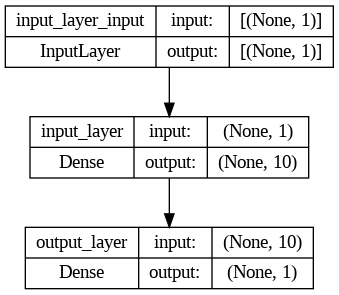

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

In [39]:
loss_history = model.history.history["loss"]
mae_history = model.history.history["mae"]

# Last loss
last_loss = loss_history[-1]
last_mae = mae_history[-1]
last_loss, last_mae

(19.393991470336914, 19.393991470336914)

## Visualizing our model's predictions
To visualize predictions, it's good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true vs y_pred (ground truth vs your model's prediction)

In [40]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 64ms/step


array([[ 78.34527 ],
       [ 83.451614],
       [ 88.557945],
       [ 93.66428 ],
       [ 98.77063 ],
       [103.87696 ],
       [108.983315],
       [114.089645],
       [119.195984],
       [124.302345]], dtype=float32)

In [41]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # If predictions exist, plot them
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show  the legend
  plt.legend()

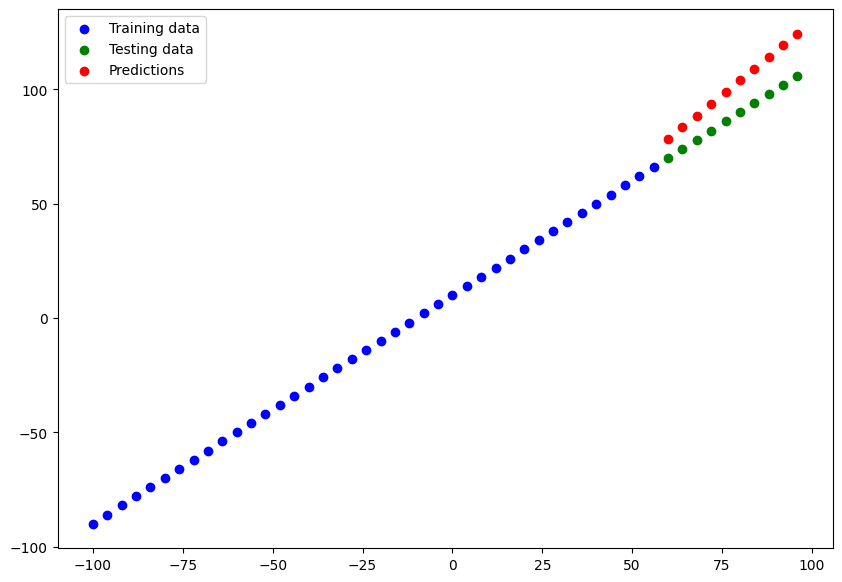

In [42]:
plot_predictions(predictions=y_pred)

##Evaluating our model's predictions with regression evaluation metrics

Depending upon your problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on regression, two of the main metrics:

1. **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions".

2. **MSE** - mean square error, "square the average errors".

In [43]:
# Evaluate our model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 170ms/step - loss: 13.3238 - mae: 13.3238


[13.32380199432373, 13.32380199432373]

In [44]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.261892, 10.509677, 10.      , 10.732857, 12.862378, 16.301569,
       20.983315, 26.089645, 31.195984, 36.302345], dtype=float32)>

In [45]:
y_pred.shape

(10, 1)

## Squeeze The Tensor to Remove Extra Dimension

In [46]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.34527 ,  83.451614,  88.557945,  93.66428 ,  98.77063 ,
       103.87696 , 108.983315, 114.089645, 119.195984, 124.302345],
      dtype=float32)>

In [47]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.323799>

In [48]:

# Let's make function for MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

## Experimenting and Comparing different models

In [49]:
def create_model(units=1, learning_rate=None, metrics=None):

  """
  Create Sequential Layer API
  """
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(units, activation="relu"),
      tf.keras.layers.Dense(1)])

  model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=metrics)
  return model

In [50]:
model_1 = create_model(units=100 , learning_rate=0.0001, metrics=tf.metrics.mean_absolute_error)
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50, verbose=0)

In [51]:
model_2 = create_model(units=100, learning_rate=0.001, metrics=tf.metrics.mean_absolute_error)
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [52]:
model_3 = create_model(units=100, learning_rate=0.00001, metrics=tf.metrics.mean_squared_error)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [53]:
model_1.summary(), model_2.summary(), model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               200       
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
To

(None, None, None)

In [54]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 94ms/step


In [55]:
mae_1 = mae(y_test, y_pred_1)
mae_2 = mae(y_test, y_pred_2)
mae_3 = mae(y_test, y_pred_3)

In [56]:
mse_1 = mse(y_test, y_pred_1)
mse_2 = mse(y_test, y_pred_2)
mse_3 = mse(y_test, y_pred_3)

In [57]:
model_compare = pd.DataFrame({"Model": ["Model_1", "Model_2", "Model_3"],
                              "MAE": [mae_1.numpy(), mae_2.numpy(), mae_3.numpy()],
                              "MSE": [mse_1.numpy(), mse_2.numpy(), mse_3.numpy()]})
model_compare

,Model,MAE,MSE
0,Model_1,72.626724,5359.84668
1,Model_2,7.474757,61.56007
2,Model_3,62.164223,3923.56250


## Saving the Model

Saving our models allows us to use them outside of Google Colab ( or wherever they are trained) such as in web application or mobile app.

There are two main format we can save our models :

1. The SavedModel format
2. The HDF5 format

In [59]:
model_2.save("model_2")

In [61]:
model_2.save("model_2.h5")

## Load the Saved Model

In [63]:
loaded_SaveModel = tf.keras.models.load_model("model_2.h5")
loaded_SaveModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
